## Tutorial 16. Classifying audio spotify style

Created by Emanuel Flores-Bautista 2019  All content contained in this notebook is licensed under a [Creative Commons License 4.0 BY NC](https://creativecommons.org/licenses/by-nc/4.0/). The code is licensed under a [MIT license](https://opensource.org/licenses/MIT).

This notebook is completely based on the following tutorial . 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
import librosa
import librosa.display
import sklearn
import TCD19_utils as TCD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#TCD.set_plotting_style_2()


%matplotlib inline
# This enables high res graphics inline
%config InlineBackend.figure_format = 'svg'

np.random.seed(42)

In [2]:
data = pd.read_csv('../data/music_data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00093.wav,0.489241,2646.469511,2988.829579,6351.719925,0.021582,140.066305,86.561470,8.234143,12.850975,...,1.118458,0.236759,-0.132498,-0.390521,-0.457268,-0.420570,-0.411695,-0.372498,-0.459317,blues
1,blues.00087.wav,0.459883,3211.488373,3117.463661,7212.148056,0.050951,161.558989,69.630652,6.258966,11.687648,...,-0.629537,-1.039986,-0.520366,-0.112448,0.247481,-0.043970,0.123469,0.057761,-0.552634,blues
2,blues.00050.wav,0.517815,3661.623007,3186.316376,7772.611333,0.085613,175.595363,52.525345,4.100323,16.924781,...,0.818254,-0.576889,-1.108253,-0.289797,-0.302520,-1.285069,-1.380524,-0.513036,-0.277262,blues
3,blues.00044.wav,0.511716,3777.321305,3227.582429,7905.102199,0.092671,176.528656,50.014865,8.763905,17.194353,...,1.152417,1.522608,-1.039158,-1.138001,1.040556,0.191806,-1.455663,-0.786561,-0.279261,blues
4,blues.00078.wav,0.535609,4009.525882,3192.111209,8115.100929,0.123506,185.946648,41.846121,-2.315485,9.679913,...,0.383298,-0.846459,-1.300384,-0.803063,-1.389913,-2.209309,-2.012832,-1.681645,-2.584521,blues


In [3]:
data.shape

(1200, 27)

In [4]:
data = data.drop(['filename'],axis=1)

In [5]:
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.489241,2646.469511,2988.829579,6351.719925,0.021582,140.066305,86.561470,8.234143,12.850975,7.309187,...,1.118458,0.236759,-0.132498,-0.390521,-0.457268,-0.420570,-0.411695,-0.372498,-0.459317,blues
1,0.459883,3211.488373,3117.463661,7212.148056,0.050951,161.558989,69.630652,6.258966,11.687648,4.923306,...,-0.629537,-1.039986,-0.520366,-0.112448,0.247481,-0.043970,0.123469,0.057761,-0.552634,blues
2,0.517815,3661.623007,3186.316376,7772.611333,0.085613,175.595363,52.525345,4.100323,16.924781,8.726860,...,0.818254,-0.576889,-1.108253,-0.289797,-0.302520,-1.285069,-1.380524,-0.513036,-0.277262,blues
3,0.511716,3777.321305,3227.582429,7905.102199,0.092671,176.528656,50.014865,8.763905,17.194353,7.628797,...,1.152417,1.522608,-1.039158,-1.138001,1.040556,0.191806,-1.455663,-0.786561,-0.279261,blues
4,0.535609,4009.525882,3192.111209,8115.100929,0.123506,185.946648,41.846121,-2.315485,9.679913,4.720989,...,0.383298,-0.846459,-1.300384,-0.803063,-1.389913,-2.209309,-2.012832,-1.681645,-2.584521,blues


In [6]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [7]:
y.shape

(1200,)

In [8]:
y[5:]

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 25)
(240, 25)
(960,)
(240,)


In [12]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000, 20), random_state=42)


In [13]:
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

In [14]:
genres = np.unique(genre_list)
genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [15]:
print(classification_report(y_test, y_pred,
                            target_names=genres))

              precision    recall  f1-score   support

       blues       0.56      0.56      0.56        18
   classical       1.00      1.00      1.00        21
     country       0.60      0.54      0.57        48
       disco       0.32      0.39      0.35        18
      hiphop       0.45      0.53      0.49        17
        jazz       0.88      0.67      0.76        21
       metal       0.71      0.71      0.71        17
         pop       0.80      0.55      0.65        22
      reggae       0.63      0.67      0.65        39
        rock       0.26      0.37      0.30        19

    accuracy                           0.60       240
   macro avg       0.62      0.60      0.60       240
weighted avg       0.63      0.60      0.61       240



In [16]:
sns.set_style('white')

In [17]:
plt.tight_layout?

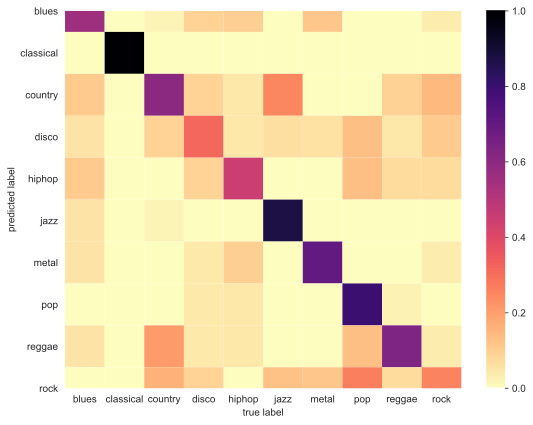

In [24]:
mat = confusion_matrix(y_test, y_pred)
mat_normalized = mat.T / mat.T.sum(axis=1)


fig, ax = plt.subplots(1,1,figsize= (8,6))
g = sns.heatmap(mat_normalized, square=False, annot=False, cbar=True,
            xticklabels=genres,yticklabels=genres, cmap = 'magma_r', ax = ax)#sns.cubehelix_palette(rot = -0.3))

ax.set_xlabel('true label')
ax.set_ylabel('predicted label')
fig.tight_layout();